In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from pandas_profiling import ProfileReport

In [2]:
train = pd.read_csv('../data/chugun_train.csv')
test = pd.read_csv('../data/chugun_test.csv')
target = pd.read_csv('../data/target_train.csv')

In [15]:
train.shape, test.shape

((2063, 13), (780, 13))

In [3]:
test.head()

,NPLV,VES,T,SI,MN,S,P,CR,NI,CU,V,TI,DATA_ZAMERA
0,512324,240100.0,1355.0,0.46,0.33,0.027,0.079,0.01,0.01,0.02,0.048,0.030,2021-05-05 17:22:54
1,512327,266400.0,1390.0,0.30,0.33,0.032,0.099,0.01,0.00,0.00,0.050,0.024,2021-05-05 20:00:30
2,512328,270200.0,1373.0,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.000,0.000,2021-05-05 22:29:21
3,512331,266700.0,1383.0,0.54,0.39,0.028,0.115,0.02,0.01,0.03,0.059,0.042,2021-05-06 01:58:11
4,512333,267400.0,1387.0,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.000,0.000,2021-05-06 05:27:08


In [4]:
train.head()

,NPLV,VES,T,SI,MN,S,P,CR,NI,CU,V,TI,DATA_ZAMERA
0,510008,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084,2021-01-01 03:15:03
1,510009,264500.0,1419.0,0.68,0.20,0.017,0.087,0.02,0.01,0.03,0.084,0.096,2021-01-01 04:23:48
2,510010,263800.0,1384.0,0.56,0.26,0.017,0.096,0.03,0.01,0.03,0.115,0.110,2021-01-01 05:21:40
3,510011,264000.0,1401.0,0.48,0.27,0.018,0.091,0.03,0.01,0.02,0.112,0.110,2021-01-01 06:20:57
4,510012,263300.0,1422.0,0.47,0.23,0.018,0.096,0.02,0.01,0.03,0.083,0.070,2021-01-01 07:23:02


In [8]:
train['is_train'] = 1
test['is_train'] = 0

train['DATA_ZAMERA'] = pd.to_datetime(train['DATA_ZAMERA'])
test['DATA_ZAMERA'] = pd.to_datetime(test['DATA_ZAMERA'])
df = pd.concat([train, test], ignore_index=True)

In [9]:
train.dtypes

NPLV                    int64
VES                   float64
T                     float64
SI                    float64
MN                    float64
S                     float64
P                     float64
CR                    float64
NI                    float64
CU                    float64
V                     float64
TI                    float64
DATA_ZAMERA    datetime64[ns]
is_train                int64
dtype: object

In [33]:
df.isna().sum()

NPLV           0
VES            0
T              0
SI             0
MN             0
S              0
P              0
CR             0
NI             0
CU             0
V              0
TI             0
DATA_ZAMERA    0
is_train       0
dtype: int64

In [30]:
df.dtypes

NPLV                    int64
VES                   float64
T                     float64
SI                    float64
MN                    float64
S                     float64
P                     float64
CR                    float64
NI                    float64
CU                    float64
V                     float64
TI                    float64
DATA_ZAMERA    datetime64[ns]
is_train                int64
dtype: object

## Что тут вообще происходит?
Как я понимаю, получили из руды мы значит чугун. Теперь хотим сделать его более качественным - без примесей и с легирующими добавками. Для этого, собственно и продуваем. И в этой таблице представленна информация касательно химического состава и некоторых других характеристик чугуна 

## NPLV

In [32]:
df.NPLV.value_counts()

510008    1
512104    1
512130    1
512131    1
512132    1
         ..
511064    1
511065    1
511066    1
511067    1
513374    1
Name: NPLV, Length: 2843, dtype: int64

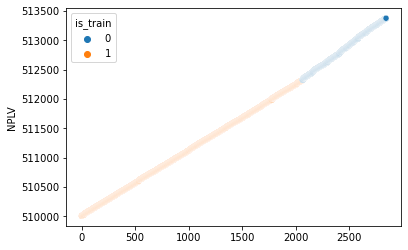

In [40]:
_ = sns.scatterplot(data=df, x=np.arange(df.shape[0]), y='NPLV', hue='is_train')

In [37]:
df.NPLV.max() - df.NPLV.min()

3366

Где-то потерялись

<AxesSubplot:>

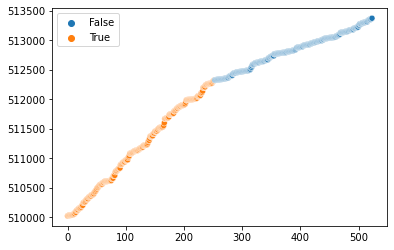

In [41]:
fair_range = np.arange(df.NPLV.min(), 1 + df.NPLV.max())
where_are_they = np.setdiff1d(fair_range, df.NPLV)
sns.scatterplot(x=np.arange(len(where_are_they)), y=where_are_they, hue=where_are_they<test.NPLV.min())

Вопросы к данным:
* Почему начинаются с 510008
* Почему какие-то удалены (и как это использовать)

## VES

In [44]:
df.VES.describe()

count      2843.000000
mean     267502.708407
std       12706.312178
min           0.000000
25%      265500.000000
50%      266300.000000
75%      270000.000000
max      312700.000000
Name: VES, dtype: float64

In [48]:
df[df.VES==df.VES.min()]

,NPLV,VES,T,SI,MN,S,P,CR,NI,CU,V,TI,DATA_ZAMERA,is_train
986,511107,0.0,0.0,0.55,0.29,0.011,0.097,0.01,0.01,0.03,0.054,0.061,2021-02-26 06:47:40,1
1008,511137,0.0,0.0,0.86,0.30,0.012,0.101,0.02,0.01,0.02,0.062,0.083,2021-02-27 23:12:44,1
2786,513305,0.0,0.0,0.80,0.32,0.016,0.094,0.02,0.01,0.03,0.098,0.110,2021-06-26 02:13:06,0


<AxesSubplot:ylabel='VES'>

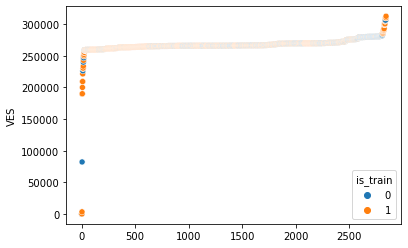

In [90]:
sns.scatterplot(data=df.sort_values('VES'), x=np.arange(df.shape[0]), y='VES', hue='is_train')

<AxesSubplot:xlabel='VES', ylabel='Count'>

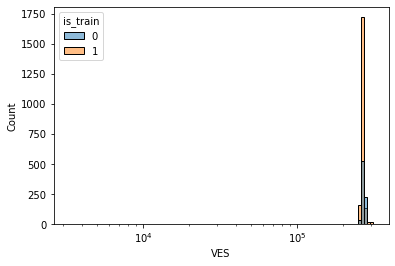

In [60]:
sns.histplot(data=df[df.VES!=df.VES.min()], x='VES', hue='is_train', log_scale=True, bins=100)

Тут беды с разбросом, что даже log_scale не спасает

<AxesSubplot:xlabel='VES', ylabel='Count'>

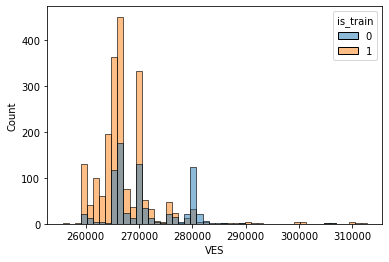

In [65]:
sns.histplot(data=df[df.VES>df.VES.quantile(0.008)], x='VES', hue='is_train', bins=50)

Видим, что тут несколько кластеров. Можно бахнуть кластеризацию и использовать как фичу (или забить и деревья все сами посчитают)

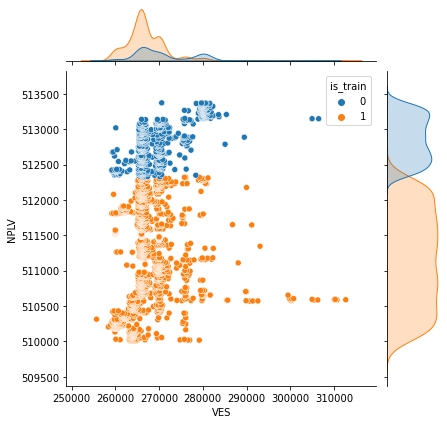

In [86]:
sns.jointplot(data=df[df.VES>df.VES.quantile(0.008)], x='VES', y='NPLV', hue='is_train')

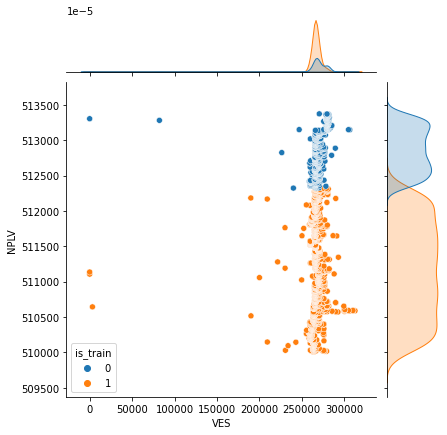

In [85]:
sns.jointplot(data=df, x='VES', y='NPLV', hue='is_train')

Видим, что для близких плавок веса похожи, а трейн и тест немного отличаются - в тесте есть жирный второй кластер

Вопросы к данным:
* Приглядеться к жирному кластеру в тесте
* Кто такие нули (и очень маленькие значения) и на что они влияют

## T

In [93]:
df['T'].describe()

count    2843.000000
mean     1397.454801
std        63.854489
min         0.000000
25%      1386.000000
50%      1402.000000
75%      1417.000000
max      1470.000000
Name: T, dtype: float64

<AxesSubplot:ylabel='T'>

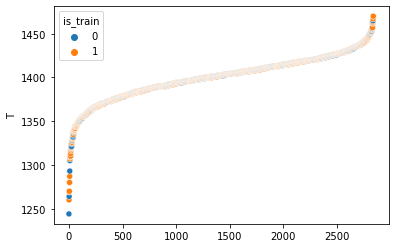

In [96]:
sns.scatterplot(data=df[df['T']>0].sort_values('T'), x=np.arange(df[df['T']>0].shape[0]), y='T', hue='is_train')

<AxesSubplot:xlabel='T', ylabel='Count'>

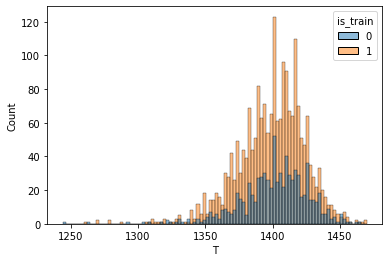

In [97]:
sns.histplot(data=df[df['T']>0], x='T', hue='is_train', bins=100)

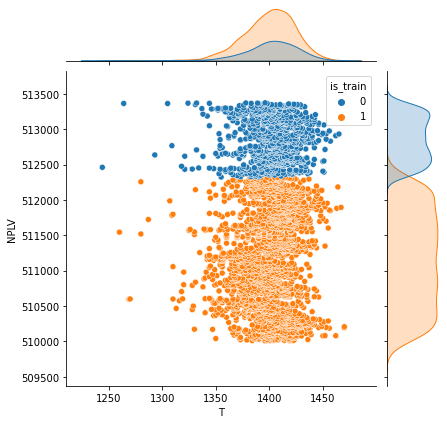

In [98]:
sns.jointplot(data=df[df['T']>0], x='T', y='NPLV', hue='is_train')

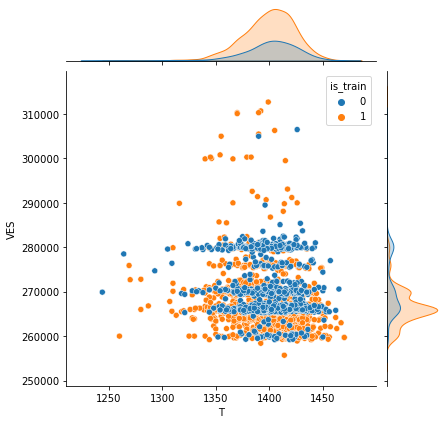

In [100]:
sns.jointplot(data=df[(df['T']>0)&(df.VES>df.VES.quantile(0.008))], x='T', y='VES', hue='is_train')

Вопросы к данным:
* Снова какого-то черта появился 0
* Есть длинный левый хвост. Почему?

## SI

**СПРАВКА**:

Кремний Si способствует графитизации чугуна, и улучшает его литейные свойства. В серых чугунах содержится 0,8 …4,5 % Si.

In [101]:
df.SI.describe()

count    2843.000000
mean        0.487707
std         0.203824
min         0.000000
25%         0.390000
50%         0.510000
75%         0.620000
max         1.020000
Name: SI, dtype: float64

<AxesSubplot:ylabel='SI'>

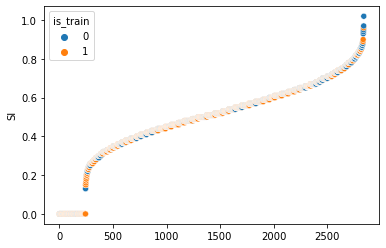

In [102]:
sns.scatterplot(data=df.sort_values('SI'), x=np.arange(df.shape[0]), y='SI', hue='is_train')

<AxesSubplot:xlabel='SI', ylabel='Count'>

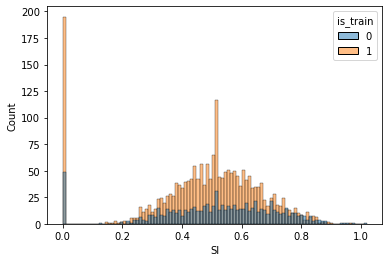

In [103]:
sns.histplot(data=df, x='SI', hue='is_train', bins=100)

Трейн и тест почти полностью совпадают

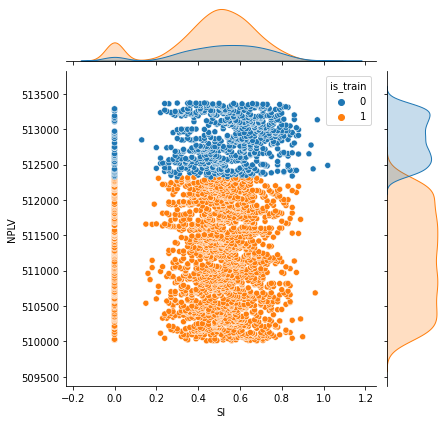

In [104]:
sns.jointplot(data=df, x='SI', y='NPLV', hue='is_train')

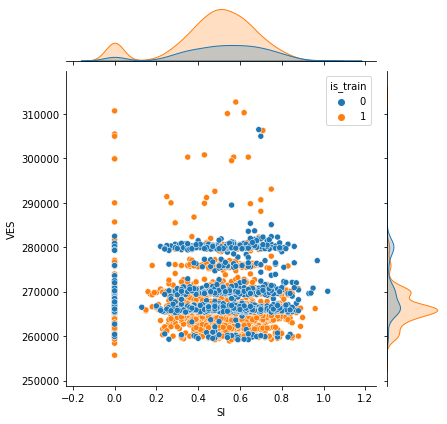

In [107]:
sns.jointplot(data=df[(df.VES>df.VES.quantile(0.008))], x='SI', y='VES', hue='is_train')

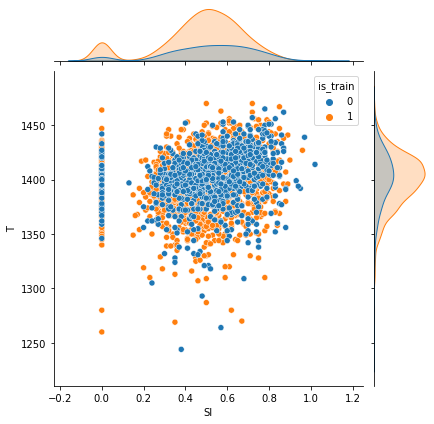

In [108]:
sns.jointplot(data=df[(df['T']>0)], x='SI', y='T', hue='is_train')

Ну кажется, что тут все достаточно красиво. Единственное - интерес вызывает нулевое содержание кремния

In [121]:
df[df.VES==0]

,NPLV,VES,T,SI,MN,S,P,CR,NI,CU,V,TI,DATA_ZAMERA,is_train,si_portion
986,511107,0.0,0.0,0.55,0.29,0.011,0.097,0.01,0.01,0.03,0.054,0.061,2021-02-26 06:47:40,1,inf
1008,511137,0.0,0.0,0.86,0.30,0.012,0.101,0.02,0.01,0.02,0.062,0.083,2021-02-27 23:12:44,1,inf
2786,513305,0.0,0.0,0.80,0.32,0.016,0.094,0.02,0.01,0.03,0.098,0.110,2021-06-26 02:13:06,0,inf


In [115]:
df['si_portion'] = df.SI / df.VES * 100
df['si_portion'][df.VES==0] = 

<AxesSubplot:ylabel='si_portion'>

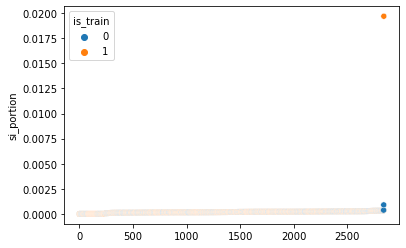

In [123]:
sns.scatterplot(data=df.sort_values('si_portion'), x=np.arange(df.shape[0]), y='si_portion', hue='is_train')

<AxesSubplot:xlabel='si_portion', ylabel='Count'>

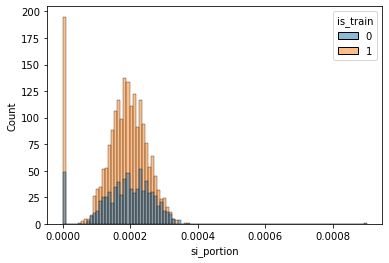

In [125]:
sns.histplot(data=df[(df.VES!=0)&(df.si_portion<0.01)], x='si_portion', hue='is_train', bins=100)

In [20]:
df['mn_portion'] = df.MN / df.VES * 100
# df['mn_portion'][df.VES==0] = 

<AxesSubplot:ylabel='mn_portion'>

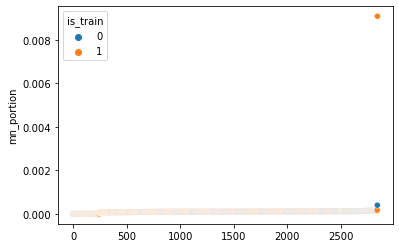

In [21]:
sns.scatterplot(data=df.sort_values('mn_portion'), x=np.arange(df.shape[0]), y='mn_portion', hue='is_train')

<AxesSubplot:xlabel='mn_portion', ylabel='Count'>

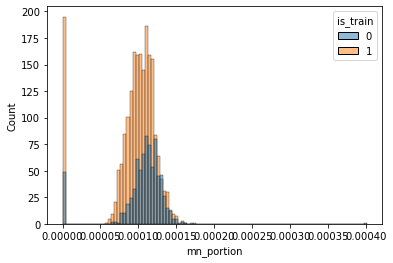

In [24]:
sns.histplot(data=df[(df.VES!=0)&(df.mn_portion<0.008)], x='mn_portion', hue='is_train', bins=100)

О круто распределение доли кремния нормальное. Это наталкивает на мысль, что возможно неплохая фича

## MN

**СПРАВКА**:

Марганец Mn способствует отбеливанию чугуна, но содержание Mn до 1,2% полезно, т.к. увеличиваются твердость и прочность чугуна.

Мне стало лень отдельно рассматривать все признаки, давайте попробуем написать некую автоматизацию

In [42]:
df.dtypes

NPLV                    int64
VES                   float64
T                     float64
SI                    float64
MN                    float64
S                     float64
P                     float64
CR                    float64
NI                    float64
CU                    float64
V                     float64
TI                    float64
DATA_ZAMERA    datetime64[ns]
is_train                int64
dtype: object

<AxesSubplot:xlabel='C', ylabel='Count'>

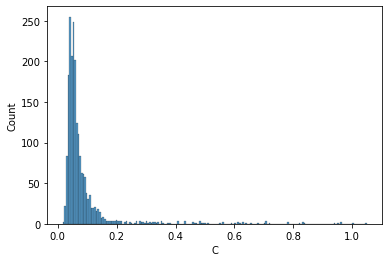

In [14]:
sns.histplot(data=target, x='C')

<AxesSubplot:xlabel='TST', ylabel='Count'>

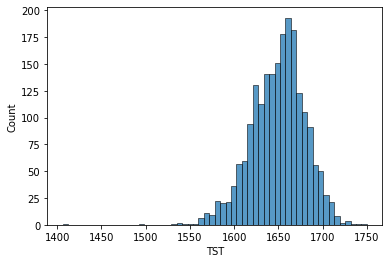

In [13]:
sns.histplot(data=target, x='TST')

<AxesSubplot:>

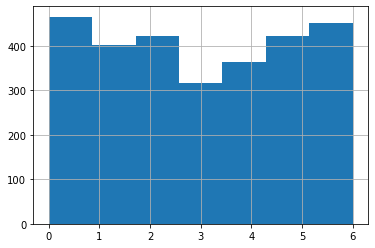

In [253]:
df.DATA_ZAMERA.dt.day_of_week.hist(bins=7)

<AxesSubplot:>

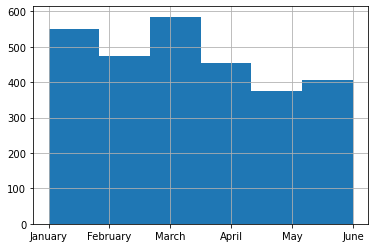

In [256]:
df.DATA_ZAMERA.dt.month_name().hist(bins=6)

<AxesSubplot:>

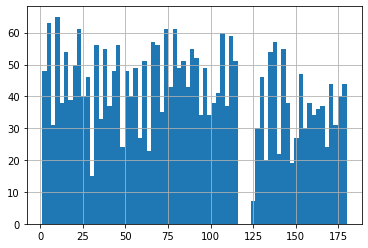

In [260]:
df.DATA_ZAMERA.dt.day_of_year.hist(bins=70)

<AxesSubplot:xlabel='DATA_ZAMERA', ylabel='C'>

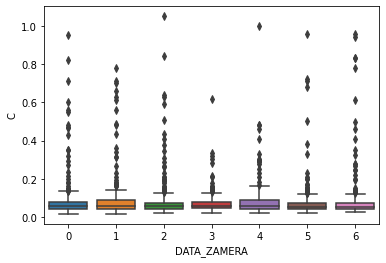

In [262]:
sns.boxplot(x=df.DATA_ZAMERA.dt.day_of_week, y=target.C)

<AxesSubplot:xlabel='DATA_ZAMERA', ylabel='TST'>

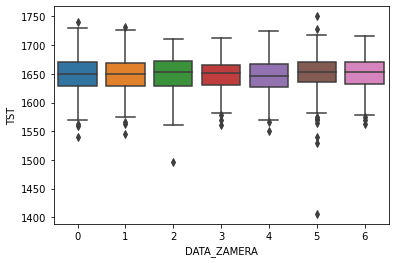

In [263]:
sns.boxplot(x=df.DATA_ZAMERA.dt.day_of_week, y=target.TST)

In [25]:
train.columns

Index(['NPLV', 'VES', 'T', 'SI', 'MN', 'S', 'P', 'CR', 'NI', 'CU', 'V', 'TI',
       'DATA_ZAMERA', 'is_train'],
      dtype='object')

In [51]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
%autoreload 2

from features import process_data

In [67]:
def metric(answers, user_csv):

    delta_c = np.abs(np.array(answers['C']) - np.array(user_csv['C']))
    hit_rate_c = np.int64(delta_c < 0.02)

    delta_t = np.abs(np.array(answers['TST']) - np.array(user_csv['TST']))
    hit_rate_t = np.int64(delta_t < 20)

    N = np.size(answers['C'])
    
    print(np.sum(hit_rate_c) / N, np.sum(hit_rate_t) / N)
    return np.sum(hit_rate_c + hit_rate_t) / 2 / N

In [91]:
split = train.shape[0] * 2 // 3
metric(target.iloc[split:], target.iloc[:split].mean())

0.3183139534883721 0.5145348837209303


0.4164244186046512

In [264]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [267]:
data = process_data(train, test)[0]
data = data.drop(['total_seconds', 'NPLV'], axis=1).drop([1024, 2041])
# target = target.drop([1024, 2041])

In [268]:
def check_model(data, modelC, modelT):
    split = data.shape[0] * 2 // 3

    X_train, y_train = data.iloc[:split], target.iloc[:split]
    X_test, y_test = data.iloc[split:train.shape[0]], target.iloc[split:data.shape[0]]

    std = StandardScaler()
    X_train = std.fit_transform(X_train)
    X_test = std.transform(X_test)

    
    modelC.fit(X_train, y_train['C'])
    modelT.fit(X_train, y_train['TST'])
    
    predicted_target = target.copy().iloc[split:data.shape[0]]
    predicted_target['C'] = modelC.predict(X_test)
    predicted_target['TST'] = modelT.predict(X_test)
    
    return metric(y_test, predicted_target)

In [269]:
split = train.shape[0] * 2 // 3
metric(target.iloc[split:], target.iloc[:split].mean())

0.31924198250728864 0.5131195335276968


0.4161807580174927

In [319]:
modelC = KNeighborsRegressor()
modelT = Ridge()

check_model(data.iloc[:target.shape[0]], modelC, modelT)

0.47307132459970885 0.5269286754002911


0.5

In [245]:
data.columns[np.abs(modelC.feature_importances_).argsort()[::-1]]

Index(['si_portion', 'S', 'VES', 'T', 'P', 'cr_portion', 'SI', 'MN',
       'p_portion', 'ni_portion', 'V', 'mn_portion', 'v_portion', 's_portion',
       'TI', 'CU', 'cu_portion', 'NI', 'ti_portion', 'CR'],
      dtype='object')

In [244]:
data.columns[np.abs(modelT.coef_).argsort()[::-1]]

Index(['s_portion', 'si_portion', 'cu_portion', 'v_portion', 'SI', 'MN', 'T',
       'TI', 'CR', 'cr_portion', 'p_portion', 'ti_portion', 'V', 'CU',
       'ni_portion', 'P', 'mn_portion', 'NI', 'S', 'VES'],
      dtype='object')

In [190]:
elements = ['SI', 'MN', 'S', 'P', 'CR', 'NI', 'CU', 'V', 'TI']

In [195]:
(data[elements]==0).all(1)

0       False
1       False
2       False
3       False
4       False
        ...  
2838    False
2839    False
2840    False
2841    False
2842    False
Length: 2842, dtype: bool

In [197]:
data[(data[elements]==0).any(1)]

,VES,T,SI,MN,S,P,CR,NI,CU,V,TI,si_portion,mn_portion,s_portion,p_portion,cr_portion,ni_portion,cu_portion,v_portion,ti_portion
11,276600.0,1404.0,0.00,0.00,0.000,0.00,0.00,0.0,0.0,0.000,0.00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
16,264300.0,1373.0,0.00,0.00,0.000,0.00,0.00,0.0,0.0,0.000,0.00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
17,264800.0,1436.0,0.00,0.00,0.000,0.00,0.00,0.0,0.0,0.000,0.00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
20,230700.0,1407.0,0.00,0.00,0.000,0.00,0.00,0.0,0.0,0.000,0.00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
59,264200.0,1462.0,0.72,0.29,0.006,0.07,0.01,0.0,0.0,0.078,0.11,0.000003,0.000001,2.271007e-08,2.649508e-07,3.785011e-08,0.0,0.0,2.952309e-07,4.163512e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,282500.0,1413.0,0.00,0.00,0.000,0.00,0.00,0.0,0.0,0.000,0.00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
2750,280900.0,1373.0,0.00,0.00,0.000,0.00,0.00,0.0,0.0,0.000,0.00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
2771,280200.0,1421.0,0.00,0.00,0.000,0.00,0.00,0.0,0.0,0.000,0.00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
2773,279500.0,1346.0,0.00,0.00,0.000,0.00,0.00,0.0,0.0,0.000,0.00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00


In [207]:
data.loc[[1025]]

,VES,T,SI,MN,S,P,CR,NI,CU,V,TI,si_portion,mn_portion,s_portion,p_portion,cr_portion,ni_portion,cu_portion,v_portion,ti_portion
1025,280500.0,1357.0,0.29,0.23,0.028,0.101,0.02,0.01,0.02,0.052,0.026,0.000001,8.199643e-07,9.982175e-08,3.600713e-07,7.130125e-08,3.565062e-08,7.130125e-08,1.853832e-07,9.269162e-08


In [188]:
data.loc[[1025]]

,VES,T,SI,MN,S,P,CR,NI,CU,V,TI,si_portion,mn_portion,s_portion,p_portion,cr_portion,ni_portion,cu_portion,v_portion,ti_portion
1025,280500.0,1357.0,0.29,0.23,0.028,0.101,0.02,0.01,0.02,0.052,0.026,0.000001,8.199643e-07,9.982175e-08,3.600713e-07,7.130125e-08,3.565062e-08,7.130125e-08,1.853832e-07,9.269162e-08
